# This is a work-in-progress notebook

We wish to know this:

1. How well does the model identify the correct number of senses for the target word?
2. **How well does the model identify the correct senses for the target word?**
3. **How well does the model assign the right words to a given sense of the target word?**
4. How well does the model assign the senses to the time intervals for the target word?

The script will evaluate **Q2** and **Q3**. Q4 will follow.

### Filenames of different model outputs must be different

In [328]:
# Basic variables and imports:

import codecs, csv, os, time, re, io
from os import listdir
from os.path import isfile, join
from  more_itertools import unique_everseen

# directories

dir_in = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_results"))
dir_out = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_output"))
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input"))

dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input","new_texts"))
#  SENSES MERGED harmonia
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "corpus_scripts_output")) 

dir_parameter = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_parameters"))
# Correct times for mus 
#dir_parameter = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses"))

# change parameter file and senses etc here

genre = "all"  # "all" by default. To focus on a specific genre change the value, cfr "s_senses" file

s_senses = io.open(dir_expert+"/senses_69419.txt","r")  # expert senses annotation
k_senses = io.open(dir_in+"/3_output_K15_mus/69419/output.dat","r") # model output
parameter_file = io.open(dir_parameter+"/params_v9.txt","r")

bugfix = 0

target_id = os.path.basename(s_senses.name)
target_id = target_id.replace("senses_","")
target_id = target_id.replace(".txt","")
print("Target ID:",target_id)

param_name = os.path.basename(parameter_file.name)
param_name = param_name.replace("params","")

print(s_senses)
print(k_senses)
print(param_name)
print(dir_out+"/"+target_id+param_name)


results_file = io.open(dir_out+"/"+target_id+param_name,"w")

# DEBUG:
#s_senses = io.open(dir_in+"/senses_69419_debug.txt","r")
#k_senses = io.open(dir_in+"/mus_debug.dat","r")
# k0 = mus4
# k1 = mus3
# k2 = mus2
# k3 = mus1
# k4 = nothing



file_senses = s_senses.readlines()[1:]
output_senses = k_senses.read()

#### SOME PARAMETERS ARE READ IN THE PARAMETER FILE

i = 0
for line in parameter_file.readlines():
    i+=1
    if i == 4:
        line = line.split("\t")
        window_size = int(line[1])
        print("Window size:",window_size,type(window_size))
        
    if i == 13:
        line = line.split("\t")
        iterations = int(line[1])
        print("Iterations:",iterations,type(iterations))
        
    
    if i == 16:
        line = line.split("\t")
        time_interval = int(line[1])
        print("Time interval:",time_interval,type(time_interval))
        
#### START TIME AND END TIME ARE NOW DEFINED BY READING THE ANNOTATION
## (because we have the same parameter file for all things)

annotation_dates = list()
for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything
        annotation_dates.append(int(cells[0]))
    
    else:
        if cells[1] == genre:
            annotation_dates.append(int(cells[0]))
            
start_time = min(annotation_dates)
end_time = max(annotation_dates)

print("start_time",start_time)
print("end_time",end_time)
        

results_file.write("Target ID %s Window size %s Start time %s End time %s Time Interval %s Iterations %s\n" % (target_id,window_size,start_time,end_time,time_interval,iterations))

Target ID: 69419
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_input/new_texts/senses_69419.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/src/dynamic-senses/greek_input/all_results/3_output_K15_mus/69419/output.dat' mode='r' encoding='UTF-8'>
_v9.txt
/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_output/69419_v9.txt
Window size: 5 <class 'int'>
Iterations: 1000 <class 'int'>
Time interval: 100 <class 'int'>
start_time -430
end_time 365


93

In [322]:
# Defining time periods from the output file

total_years = end_time-start_time
perioddd = 0
temp_start_time = start_time

for year in range(temp_start_time,end_time+1):
    if temp_start_time + time_interval < end_time+1:
        perioddd +=1
        print(perioddd)
        temp_start_time += time_interval

number_of_slices = perioddd + 1

slice_duration = time_interval # read from the parameter file
print(slice_duration)

print(start_time,end_time)

slice_years = dict()

for period in range(0,number_of_slices):
    slice_years[period] = list()
    
   # if period == number_of_slices-1:
   #     for i in range(latest_i,end_time):
   #         slice_years[period].append(i)  
    
    #if period != number_of_slices-1:
    for i in range(start_time,end_time+1):
        
        if i >= int(period*slice_duration) + start_time:
            if i < int((period+1)*slice_duration) + start_time:
                slice_years[period].append(i)
                latest_i = i
                
#slice_years[period].append(latest_i+1)  #  in case we have a slice that ends on a century
                    
        
        
    

print(slice_years)

1
2
3
4
5
6
7
100
-430 365
{0: [-430, -429, -428, -427, -426, -425, -424, -423, -422, -421, -420, -419, -418, -417, -416, -415, -414, -413, -412, -411, -410, -409, -408, -407, -406, -405, -404, -403, -402, -401, -400, -399, -398, -397, -396, -395, -394, -393, -392, -391, -390, -389, -388, -387, -386, -385, -384, -383, -382, -381, -380, -379, -378, -377, -376, -375, -374, -373, -372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -351, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340, -339, -338, -337, -336, -335, -334, -333, -332, -331], 1: [-330, -329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318, -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271, -27

## TODO

- ~~create the notebook~~
- ~~organise the notebook~~
- ~~write "general idea" pseudocode for the evaluation~~
- ~~get input files~~
- ~~figure out data structures to store the variables~~
- ~~write actual code~~

## Q2: How well does the model identify the correct senses for the target word?

### Pseudocode 

### Real code

Steps:

- extract all senses from the file
- use those senses as keys for a dictionary, `dict_of_words`
- fill the dictionary: for each key, we store a list of words pertaining to that sense
- transform the lists as sets so as to remove duplicates within the same sense
- create a dictionary with a word as a key and its weight as a value, depending on how many senses it appears
- parse the model output and get the probability weights for each word
- do not take into account the first line
- take care of empty lines

Todo:




In [323]:
expert_senses = list() # list where we store all sense ids provided by expert
#sense_for_period_counter = 0


for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                expert_senses.append(sense)    
            else:
                expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
        else:
             expert_senses.append("NA")
                
    else: # specific genre only
        
        if cells[1] == genre:

            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    expert_senses.append(sense)    
                else:
                    expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
            else:
                 expert_senses.append("NA")


#print(len(expert_senses),expert_senses,len(set(expert_senses)))


expert_senses_set = list(set(expert_senses)) # we only keep the unique senses
expert_senses = list(unique_everseen(expert_senses))
print("SET",expert_senses_set)
print("ITERTOOLS",expert_senses)

number_of_s = len(expert_senses)  # we create a variable that stores the number of unique senses
print("Number of senses:",number_of_s,expert_senses)

# This dictionary has a sense as a key, and a list of words as a value. 
dict_of_words = dict()
# This list stores all words
list_of_all_words = list()
# This dictionary stores all words as keys and their weight as value
word_weight = dict()
# This dictionary stores the number of times a sense appears in a slice
sense_date_amount = dict()

# This list stores words in w and not collocates senses
list_of_NA_words = list()

dummy_counter = 0


sentences_smaller_than_window_size = 0

for i in range(0,number_of_s): # for each sense, we create a dictionary entry which has a list as value
    dict_of_words[expert_senses[i]] = list()
    print(expert_senses[i])

    for line in file_senses: # we go back in the file
        
        
        
        cells = line.split("\t") # splitting on tabs
        
        if genre == "all":   # all genres
            
            if int(cells[12]) == 1:  # senses inferred from collocates
                if cells[11] == expert_senses[i]:      # we store all words for one sense 


                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_ids_window.append(list_of_ids[n])

                        except IndexError: # if there isn't, too bad
                            sentences_smaller_than_window_size += 1

                    for word_id in list_of_ids_window:
                        if int(cells[12]) == 1:


                            if cells[11] == expert_senses[i]:  

                                dict_of_words[expert_senses[i]].append(word_id)                    

                        list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                # if the sense is "w", the collocates are put in the "NA words"

                if cells[11] == "w":
                    #print("W")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                            dummy_counter +=1

            else:  # words that are in "non collocates senses"
                #print("NON COLOC")
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                #print(sentence_of_ids)
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                #print(index_of_target)
                list_of_ids_window = list()
                #print(index_of_target-window_size,index_of_target+window_size+1)
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account
                        #print(list_of_ids_window)
                        #print(list_of_ids[n])
                        list_of_NA_words.append(list_of_ids[n])
                        list_of_all_words.append(list_of_ids[n])
                    except IndexError:
                            dummy_counter +=1
                #print(list_of_NA_words)
                
        else:
            
            if cells[1] == genre:
                if int(cells[12]) == 1:  # senses inferred from collocates
                    if cells[11] == expert_senses[i]:      # we store all words for one sense 


                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_ids_window.append(list_of_ids[n])

                            except IndexError: # if there isn't, too bad
                                sentences_smaller_than_window_size += 1

                        for word_id in list_of_ids_window:
                            if int(cells[12]) == 1:


                                if cells[11] == expert_senses[i]:  

                                    dict_of_words[expert_senses[i]].append(word_id)                    

                            list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                    # if the sense is "w", the collocates are put in the "NA words"

                    if cells[11] == "w":
                        #print("W")
                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_NA_words.append(list_of_ids[n])
                                list_of_all_words.append(list_of_ids[n])
                            except IndexError:
                                dummy_counter +=1

                else:  # words that are in "non collocates senses"
                    #print("NON COLOC")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    #print(sentence_of_ids)
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    #print(index_of_target)
                    list_of_ids_window = list()
                    #print(index_of_target-window_size,index_of_target+window_size+1)
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account
                            #print(list_of_ids_window)
                            #print(list_of_ids[n])
                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                                dummy_counter +=1
                    #print(list_of_NA_words)





            
            
            
            
            
            
            
            
            
    # Here, we remove duplicates
    #dict_of_words[expert_senses[i]].append("79223") #testing
    
    dict_of_words[expert_senses[i]] = list(set(dict_of_words[expert_senses[i]]))
    
    
      
    print("i",i,"sense",expert_senses[i],"number of words",len(dict_of_words[expert_senses[i]]))
    print("words",set(dict_of_words[expert_senses[i]]))
    print("\n\n")

# NOW THAT WE HAVE A LIST OF NA WORDS 
# We can put that in the dict_of_words[expert_sense] dictionary
#print("NA words",list_of_NA_words)
list_of_NA_words = list(set(list_of_NA_words))
dict_of_words["NA"] = list_of_NA_words

print("sentences smaller than window size",window_size,":",sentences_smaller_than_window_size)
#print("dummy",dummy_counter)
print("number of NA words:",len(list_of_NA_words))
print("same?",len(dict_of_words["NA"]))

results_file.write("Expert senses %s Total %s \n" %(expert_senses,len(expert_senses)))

SET ['mus-4', 'mus-1', 'mus-2', 'NA']
ITERTOOLS ['mus-1', 'NA', 'mus-4', 'mus-2']
Number of senses: 4 ['mus-1', 'NA', 'mus-4', 'mus-2']
mus-1
i 0 sense mus-1 number of words 263
words {'51376', '47964', '64448', '42659', '82665', '8909', '104429', '84552', '104920', '49227', '38732', '15763', '110484', '84422', '69419', '678', '37711', '24856', '93786', 'nlsj114757', '47447', '40545', 'nlsj80462', '115810', '45513', '23283', '13427', '92406', '45917', '84234', '29883', '17007', '18334', '55997', '108780', '114548', '41538', '113823', 'nlsj4784', '98173', '103942', 'nlsj40053', '71065', '76765', '34855', '12641', '6174', '51300', '71308', 'nlsj69856', '63845', '58478', '83665', '110114', '114587', '100965', '105816', '64586', '16052', '46966', '80555', '52460', '14181', '89309', 'nlsj71743', '80761', '110456', '75477', '94941', '80239', '18128', '31709', '76335', 'nlsj8970', '107959', '67250', '73707', '70958', '2583', '76157', '31236', '29962', '75552', 'nlsj4320', '53695', '5607', '33

57

In [324]:
sense_date_amount = dict() # dict where we have the number of senses for [sense,period]

# this dictionary is now initialised with 0 for each CORRECT sense,period pair we have
for sense in expert_senses:
    for period in slice_years.keys():
        sense_date_amount[sense,period] = 0
        
print(sense_date_amount,"\n")        

counter = 0

for line in file_senses: 
    #print(len(file_senses))
    cells = line.split("\t")
    
    if genre == "all":
    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            #print(sense)


            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                #expert_senses.append(sense)

                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount[sense,period] += 1
                        counter += 1

            else:
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1



        if sense == "w":  # counting the NAs
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1
                    

    else:
        if genre == cells[1]:
            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                #print(sense)


                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    #expert_senses.append(sense)

                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount[sense,period] += 1
                            counter += 1

                else:
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1



            if sense == "w":  # counting the NAs
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1
                    
print(sense_date_amount)
print(counter)

{('mus-1', 0): 0, ('mus-1', 1): 0, ('mus-1', 2): 0, ('mus-1', 3): 0, ('mus-1', 4): 0, ('mus-1', 5): 0, ('mus-1', 6): 0, ('mus-1', 7): 0, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 0, ('NA', 4): 0, ('NA', 5): 0, ('NA', 6): 0, ('NA', 7): 0, ('mus-4', 0): 0, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 0, ('mus-4', 4): 0, ('mus-4', 5): 0, ('mus-4', 6): 0, ('mus-4', 7): 0, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 0, ('mus-2', 7): 0} 

{('mus-1', 0): 3, ('mus-1', 1): 4, ('mus-1', 2): 1, ('mus-1', 3): 2, ('mus-1', 4): 2, ('mus-1', 5): 14, ('mus-1', 6): 14, ('mus-1', 7): 0, ('NA', 0): 16, ('NA', 1): 3, ('NA', 2): 3, ('NA', 3): 2, ('NA', 4): 6, ('NA', 5): 15, ('NA', 6): 45, ('NA', 7): 1, ('mus-4', 0): 21, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 1, ('mus-4', 4): 0, ('mus-4', 5): 21, ('mus-4', 6): 8, ('mus-4', 7): 1, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, 

In [325]:
# For every word in the list of words that we have
# we count the number of senses it appears in
# we use that number to divide its importance: 1 sense = 1 importance; 2 senses = 0.5 importance
# this can be finetuned

print(expert_senses)
#print("list_of_NA_words",list_of_NA_words,"\n\n")
#print("list of mus 1 words",dict_of_words['mus-1'])

# This dictionary stores words in w and not collocates senses
word_weight_NA = dict()

for word in list_of_all_words:
#word = "113560"
    x = 0  # number of times word appears in different senses excluding NAs
    z = 0 # number of times word appears in different senses including NAs
#print(word)
    for i in range(0,number_of_s):
        if word in dict_of_words[expert_senses[i]]:
            #if word == "105344":
            #    print("YO")
                
            if expert_senses[i] != "NA":
                x += 1 
                #print("froot the loop")
                

    if x != 0:
        word_weight[word] = float(1/x)
        #print(word,"this is a x!=0",x,"this is its weight",float(1/x))
        
        if word in list_of_NA_words:
            z = x + 1
            #print(z)
            #print(word,"this is a z",z,"this is its weight",float(1/z))
            
            word_weight_NA[word] = float(1/z)
            
    else:  # if word doesn't exist in non-NA senses
        word_weight_NA[word] = 1/1
        word_weight[word] = 0  # with this we prevent the case that a word that is ONLY in NA has no weight 
  
        
    #else: 
    #    word_weight_NA[word] = word_weight[word]
        
#print(word_weight_NA)    
#print(word,word_weight[word])

#print(word_weight_NA["53826"])

#for key in word_weight_NA.keys():
#    print(key,word_weight_NA[key])


#for word in list_of_all_words:
#    try: 
#        print(word,word_weight[word])
#    except KeyError:
#        print(word,"isnt in non-NA senses")
#    try:
#        print(word,word_weight_NA[word])
#    except KeyError:
#        print(word,"isnt in NA sense")

['mus-1', 'NA', 'mus-4', 'mus-2']


#### parsing output.dat
- split on "===============  per time  ===============" and keep first part
- transform that into a list, then
- get lines that start with "p(w|s)"
- count those, k = that number
- split the line on ":", keep the second part
- split the rest on ";", it's [ID] = prob_from_this_ID

In [327]:
lines_output = output_senses.split("===============  per time  ===============")[0].split("\n")

number_of_the_k = 0

k_words_with_prob = dict()

for line in lines_output:
    if line[:6] == "p(w|s)":
        print(line)
        line = line.split(":")[1]
        line = line.split(";")
        #print(number_of_the_k,line)
        dico_word_prob = dict()
        temp_dict = dict()
        k_words_with_prob[number_of_the_k] = list()
        
        line = line[:-1] # last item of the list is empty
        
        total_probability = 0 # to have relative probs
        print(line)
        for word_prob in line:
            print(word_prob)

        
            #word_prob = word_prob.split(",")
            #for word in word_prob:
            probability = re.findall("([\d.\w]*)",word_prob)
            if probability:
                probability = list(filter(None,probability))
                    
            total_probability += float(probability[1])
            print("word id",probability[0],"; probability",probability[1])
        
            dico_word_prob[probability[0]] = float(probability[1])
        #print(type(k_words_with_prob[number_of_the_k]))
        
        for i in dico_word_prob.keys():
            
            temp_dict[i] = float(dico_word_prob[i]/total_probability)
            k_words_with_prob[number_of_the_k] = temp_dict
            
            print(k_words_with_prob[number_of_the_k])
            
        #k_words_with_prob[number_of_the_k] = [float(dico_word_prob[i]/total_probability) for i in dico_word_prob]
        #print(k_words_with_prob[number_of_the_k])
        print(temp_dict)
        number_of_the_k += 1
        

results_file.write("Output senses %s \n\n" %(number_of_the_k))

p(w|s) = sum_t P(w|t,s)  T=-1,K=0:  34848 (0.276) ; 76157 (0.156) ; 69419 (0.102) ; 73221 (0.049) ; 36390 (0.044) ; nlsj42558 (0.030) ; 19268 (0.028) ; 12973 (0.028) ; 59708 (0.025) ; 12625 (0.019) ; 
['  34848 (0.276) ', ' 76157 (0.156) ', ' 69419 (0.102) ', ' 73221 (0.049) ', ' 36390 (0.044) ', ' nlsj42558 (0.030) ', ' 19268 (0.028) ', ' 12973 (0.028) ', ' 59708 (0.025) ', ' 12625 (0.019) ']
  34848 (0.276) 
word id 34848 ; probability 0.276
 76157 (0.156) 
word id 76157 ; probability 0.156
 69419 (0.102) 
word id 69419 ; probability 0.102
 73221 (0.049) 
word id 73221 ; probability 0.049
 36390 (0.044) 
word id 36390 ; probability 0.044
 nlsj42558 (0.030) 
word id nlsj42558 ; probability 0.030
 19268 (0.028) 
word id 19268 ; probability 0.028
 12973 (0.028) 
word id 12973 ; probability 0.028
 59708 (0.025) 
word id 59708 ; probability 0.025
 12625 (0.019) 
word id 12625 ; probability 0.019
{'34848': 0.3645970937912813}
{'34848': 0.3645970937912813, '76157': 0.20607661822985462}
{'34

IndexError: list index out of range

#### k_words_with_prob
This dictionary has the sense number 'k' as keys and the a dictionary of [word] = probability as values.
Example below.

In [293]:
for key in k_words_with_prob.keys():
    print("output sense",key)
    for i in range(0,number_of_s):
        print("\texpert sense number ", i, expert_senses[i])
        for second_key in k_words_with_prob[key].keys(): # Barbara's note: shouldn't it be k_words_with_prob[i] here?
            print("\t\tword from annotation for sense", key, ":", second_key)
            if second_key in dict_of_words[expert_senses[i]]:
                if expert_senses[i] != "NA":
                    print("\t\t\t\tnormal")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight[second_key])

                else:
                    print("\t\t\t\tNA")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight_NA[second_key])

                
# Here we get all the senses and for each sense we do a matching between the k words and s words and get the probability
# For some reason the first word for each sense arrives several times


output sense 0
	expert sense number  0 NA
		word from annotation for sense 0 : 15281
				NA
			word  15281 is in output for sense 0 with probability: 0.27894736842105256 and weight: 0.25
		word from annotation for sense 0 : 63772
				NA
			word  63772 is in output for sense 0 with probability: 0.1447368421052631 and weight: 0.25
		word from annotation for sense 0 : 65552
				NA
			word  65552 is in output for sense 0 with probability: 0.11052631578947365 and weight: 0.3333333333333333
		word from annotation for sense 0 : 76029
				NA
			word  76029 is in output for sense 0 with probability: 0.08421052631578944 and weight: 0.5
		word from annotation for sense 0 : 70839
				NA
			word  70839 is in output for sense 0 with probability: 0.0789473684210526 and weight: 1.0
		word from annotation for sense 0 : 84234
				NA
			word  84234 is in output for sense 0 with probability: 0.0763157894736842 and weight: 0.3333333333333333
		word from annotation for sense 0 : 11894
				NA
			word  11894 

		word from annotation for sense 8 : 12485
				normal
			word  12485 is in output for sense 8 with probability: 0.10932475884244372 and weight: 0.3333333333333333
		word from annotation for sense 8 : 76703
		word from annotation for sense 8 : nlsj32160
		word from annotation for sense 8 : 69982
		word from annotation for sense 8 : 88498
		word from annotation for sense 8 : 35708
		word from annotation for sense 8 : 6325
		word from annotation for sense 8 : 31236
	expert sense number  2 harmonia:musical
		word from annotation for sense 8 : 58157
		word from annotation for sense 8 : 36180
				normal
			word  36180 is in output for sense 8 with probability: 0.14147909967845657 and weight: 0.5
		word from annotation for sense 8 : 12485
				normal
			word  12485 is in output for sense 8 with probability: 0.10932475884244372 and weight: 0.3333333333333333
		word from annotation for sense 8 : 76703
				normal
			word  76703 is in output for sense 8 with probability: 0.10610932475884242 and we

		word from annotation for sense 14 : 46861
		word from annotation for sense 14 : 65565
				normal
			word  65565 is in output for sense 14 with probability: 0.06079027355623099 and weight: 0.3333333333333333
	expert sense number  3 harmonia:abstract
		word from annotation for sense 14 : 31607
				normal
			word  31607 is in output for sense 14 with probability: 0.19148936170212763 and weight: 0.5
		word from annotation for sense 14 : 31945
		word from annotation for sense 14 : 63772
				normal
			word  63772 is in output for sense 14 with probability: 0.1276595744680851 and weight: 0.3333333333333333
		word from annotation for sense 14 : 16943
				normal
			word  16943 is in output for sense 14 with probability: 0.11854103343465043 and weight: 1.0
		word from annotation for sense 14 : 7211
		word from annotation for sense 14 : 99507
				normal
			word  99507 is in output for sense 14 with probability: 0.06990881458966564 and weight: 0.3333333333333333
		word from annotation for sense 

In [294]:
print(expert_senses)

['NA', 'harmonia:concrete', 'harmonia:musical', 'harmonia:abstract']


In [295]:
## Calculating confidence score for each (words_of_k,words_of_s) pair

# conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))
        # match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 

    
print("number of expert senses s:",number_of_s)
print("number of model output senses k:",len(k_words_with_prob.keys()))
compteur = 0

match = dict()
conf = dict()
for k in k_words_with_prob.keys():  # for each output sense, we go through...
    print("\n")
    print("Choose best match for k =",k)
    for s in range(0,number_of_s):       # each expert sense
        
        conf[k,s] = 0 
        
        #print("expert sense",s)
        for mot in k_words_with_prob[k]:      # for each word within output by the model for the output sense
            print("k,mot",k,mot)
            print("s",s,"expert_senses[s]",expert_senses[s])
            
            if expert_senses[s] == "NA":
                
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight_NA[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight_NA[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                
                
            else:    
 
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                    #else: 
                        #print(word,"has no match for sense",expert_senses[s])
                        #print(word,word_weight[word],"match",k_words_with_prob[k][mot],"match weighted",match_weighted)
                    #print("test1")
                #print("test2")
                
                    #compteur += 1
                
        #if (k,s) in conf.keys():
        
            #conf[k,s] = conf[k,s] # with or without /10
            #print("k =",k,"\t s =",s,"(= expert sense",expert_senses[s],")\t conf[k,s] =",conf[k,s])
            
            #print(compteur)
            
    #print(k_words_with_prob[k])


number of expert senses s: 4
number of model output senses k: 15


Choose best match for k = 0
k,mot 0 15281
s 0 expert_senses[s] NA
k_words_with_prob[k][mot] 0.27894736842105256
word_weight[mot] 0.25
sense NA mot 15281 match_weighted 0.06973684210526314
k,mot 0 63772
s 0 expert_senses[s] NA
k_words_with_prob[k][mot] 0.1447368421052631
word_weight[mot] 0.25
sense NA mot 63772 match_weighted 0.03618421052631578
k,mot 0 65552
s 0 expert_senses[s] NA
k_words_with_prob[k][mot] 0.11052631578947365
word_weight[mot] 0.3333333333333333
sense NA mot 65552 match_weighted 0.036842105263157884
k,mot 0 76029
s 0 expert_senses[s] NA
k_words_with_prob[k][mot] 0.08421052631578944
word_weight[mot] 0.5
sense NA mot 76029 match_weighted 0.04210526315789472
k,mot 0 70839
s 0 expert_senses[s] NA
k_words_with_prob[k][mot] 0.0789473684210526
word_weight[mot] 1.0
sense NA mot 70839 match_weighted 0.0789473684210526
k,mot 0 84234
s 0 expert_senses[s] NA
k_words_with_prob[k][mot] 0.0763157894736842
word_weight[

sense harmonia:musical mot 31236 match_weighted 0.14790996784565913
k,mot 5 1837
s 2 expert_senses[s] harmonia:musical
k,mot 5 65295
s 2 expert_senses[s] harmonia:musical
k,mot 5 14096
s 2 expert_senses[s] harmonia:musical
k,mot 5 49780
s 2 expert_senses[s] harmonia:musical
k,mot 5 56723
s 2 expert_senses[s] harmonia:musical
k_words_with_prob[k][mot] 0.07073954983922828
word_weight[mot] 0.5
sense harmonia:musical mot 56723 match_weighted 0.03536977491961414
k,mot 5 6227
s 2 expert_senses[s] harmonia:musical
k_words_with_prob[k][mot] 0.067524115755627
word_weight[mot] 0.5
sense harmonia:musical mot 6227 match_weighted 0.0337620578778135
k,mot 5 63772
s 2 expert_senses[s] harmonia:musical
k_words_with_prob[k][mot] 0.067524115755627
word_weight[mot] 0.3333333333333333
sense harmonia:musical mot 63772 match_weighted 0.022508038585209
k,mot 5 48579
s 2 expert_senses[s] harmonia:musical
k,mot 5 34138
s 2 expert_senses[s] harmonia:musical
k_words_with_prob[k][mot] 0.061093247588424424
word_we

s 2 expert_senses[s] harmonia:musical
k_words_with_prob[k][mot] 0.08294930875576037
word_weight[mot] 0.5
sense harmonia:musical mot 84234 match_weighted 0.041474654377880185
k,mot 11 24988
s 2 expert_senses[s] harmonia:musical
k,mot 11 98414
s 2 expert_senses[s] harmonia:musical
k,mot 11 63772
s 2 expert_senses[s] harmonia:musical
k_words_with_prob[k][mot] 0.06912442396313365
word_weight[mot] 0.3333333333333333
sense harmonia:musical mot 63772 match_weighted 0.02304147465437788
k,mot 11 114753
s 3 expert_senses[s] harmonia:abstract
k_words_with_prob[k][mot] 0.15668202764976963
word_weight[mot] 0.5
sense harmonia:abstract mot 114753 match_weighted 0.07834101382488481
k,mot 11 101851
s 3 expert_senses[s] harmonia:abstract
k_words_with_prob[k][mot] 0.12903225806451615
word_weight[mot] 0.3333333333333333
sense harmonia:abstract mot 101851 match_weighted 0.043010752688172046
k,mot 11 93491
s 3 expert_senses[s] harmonia:abstract
k,mot 11 45794
s 3 expert_senses[s] harmonia:abstract
k_words_w

In [296]:
print(conf)

k_s_match = dict()  # k_s_match[k] = s

for k in range(0,number_of_the_k):
    print("k",k)
    liste_temp = list()
    best_s_for_k = "NA"
    conf[k,best_s_for_k] = -1

    
    for s in range(0,len(expert_senses)):
        print("conf[k,s]",conf[k,s],"s",s,"best s for k",best_s_for_k)
        #print(type(conf[k,s]))
        liste_temp.append(conf[k,s])
        
        
        try:
            if conf[k,s] > conf[k,best_s_for_k]: 
                #print("NEW best_s:",s)
                best_s_for_k = s
                
        except KeyError:
            print("key error should not happen")
        
    sorted_liste_temp = sorted(liste_temp, reverse=True)
    

    
    print("k, best s:",k,best_s_for_k)
    if conf[k,best_s_for_k] > sorted_liste_temp[1] + sorted_liste_temp[2]: # if the MAX is higher than the sum of the following two
        
        if conf[k,best_s_for_k] > 1/(len(expert_senses)+1): # if the MAX is higher than the random baseline (number of sense + NA)
            k_s_match[k] = best_s_for_k
            print("MATCH: k",k,"s",best_s_for_k)
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            results_file.write("MATCH: k %s and s %s \n" %(k,best_s_for_k))
            
        else:
            print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < 1/(# of expert senses+1)")
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            k_s_match[k] = "NA"
    else:
        print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < max2+max3")
        print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
        k_s_match[k] = "NA"
        
        #if conf[k,best_s_for_k] > 1/(len(expert_senses)+1):
         #   print("also: reason: max < 1/(# of expert senses+1)\n")

{(0, 0): 0.3932017543859648, (0, 1): 0.19649122807017536, (0, 2): 0.31359649122807004, (0, 3): 0.36096491228070166, (1, 0): 0.31166666666666676, (1, 1): 0.12533333333333335, (1, 2): 0.4993333333333335, (1, 3): 0.37533333333333346, (2, 0): 0.15972222222222227, (2, 1): 0.030193236714975848, (2, 2): 0.4740338164251209, (2, 3): 0.28562801932367154, (3, 0): 0.2637590861889927, (3, 1): 0.1692627206645898, (3, 2): 0.42471443406022846, (3, 3): 0.32502596053997923, (4, 0): 0.4172113289760348, (4, 1): 0.2106027596223674, (4, 2): 0.30755265068990556, (4, 3): 0.3010167029774872, (5, 0): 0.5345659163987138, (5, 1): 0.022508038585209, (5, 2): 0.3006430868167202, (5, 3): 0.4292604501607716, (6, 0): 0.06986788617886178, (6, 1): 0.13922764227642273, (6, 2): 0.4944105691056909, (6, 3): 0.36636178861788604, (7, 0): 0.32073643410852715, (7, 1): 0.2558139534883721, (7, 2): 0.2286821705426357, (7, 3): 0.3023255813953489, (8, 0): 0.31939978563772775, (8, 1): 0.03644158628081457, (8, 2): 0.5846730975348337, (

Correct pairs (Alessandro): v1

- K0 - S0 / S1
- K1 - S3 / S1
- K2 - S3
- K3 - S2
- K4 - S0 / S1

In [297]:
# For all k->s pair we have in the k_s_match dictionary, we create the inverted dictionary :
# s_k_match[s] contains all the k assigned to that s

s_k_match = dict()
print(k_s_match)
for key in k_s_match.keys():
    try: 
        s_k_match[k_s_match[key]].append(key)
        
    except KeyError:
        s_k_match[k_s_match[key]] = list()
        s_k_match[k_s_match[key]].append(key)
        
print("for each s, the k (or more) assigned to it:",s_k_match)
print(expert_senses[3])        
        
    

{0: 'NA', 1: 'NA', 2: 2, 3: 'NA', 4: 'NA', 5: 'NA', 6: 'NA', 7: 'NA', 8: 2, 9: 3, 10: 'NA', 11: 'NA', 12: 2, 13: 'NA', 14: 'NA'}
for each s, the k (or more) assigned to it: {'NA': [0, 1, 3, 4, 5, 6, 7, 10, 11, 13, 14], 2: [2, 8, 12], 3: [9]}
harmonia:abstract


## Q3: How well does the model assign the right words to a given sense of the target word?

## TODO : 
1. ~~create another word_weight[] only for NA~~
2. ~~in this word_weight[], a word that is in an NA (either because w or !=1) has its weight 1/senses, BUT THAT DOES NOT AFFECT THE real word_weight[]~~
3. when a k,s match is correctly NA: precision and recall cfr picture

ALSO:
1. ~~create a s_k_match dictionary that maps s with one or more k assigned by the model. This allows to calculate a new P and R~~
2. ~~s_k_match[s] = [kx, ky] (based on matches)~~
3. ~~precision and recall for each s, and averaged precisions and recalls as well~~


### This is Pr and Re for Ks -> not taken into account

In [298]:
precision_recall_k = dict()

print("\t\t\tTHIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below\n\n\n")

for key in k_s_match.keys():
    precision_recall_k[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()



############# NEED TO ADJUST FOR PAIRS THAT ARE NAs  --> actually no


    if k_s_match[key] == "NA":
        print("K",key,"s is NA")

    else: 
    
        for word in k_words_with_prob[int(key)]: 
            w_weight_precision = k_words_with_prob[int(key)][word] * 1
            denominator_precision += float(w_weight_precision)
        
        
        
            if word in dict_of_words[expert_senses[int(k_s_match[key])]]:   
                w_weight_recall = k_words_with_prob[int(key)][word] * 1
                numerator_recall += float(w_weight_recall)

                numerator_precision += float(w_weight_precision)
    
        for mot in dict_of_words[expert_senses[int(k_s_match[key])]]:
            denominator_recall += word_weight[mot]
        

    #denominator_recall = len(dict_of_words[expert_senses[int(key[2])]])
    #numerator_recall = numerator_recall*10
     
    
        print("For pair ks",key,k_s_match[key],":")
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[k_s_match[key]]])
    
        precision_recall_k[key].append(recall)
    
        print(len(dict_of_words[expert_senses[k_s_match[key]]]))
        print("The RECALL is",numerator_recall,"/",denominator_recall,"=",recall) 
        if numerator_precision == 0:
            print("The PRECISION IS NA")
        else:
            precision = numerator_precision/denominator_precision
            print("The PRECISION is",numerator_precision,"* number of expert words in that sense/",denominator_precision,"=",precision,"\n")
            precision_recall_k[key].append(precision)
        
        if (numerator_precision/denominator_precision)+(numerator_recall/denominator_recall) != 0: 
            fscore = (2*(precision)*(recall)/((precision)+(recall)))
            print("The F-SCORE is", fscore,"\n")
            precision_recall_k[key].append(fscore)
        
        else:
            print("No F-SCORE, can't divide by 0\n\n")
        

			THIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below



K 0 s is NA
K 1 s is NA
For pair ks 2 2 :
825
The RECALL is 0.713768115942029 / 688.6666666666669 = 0.8550707100467189
The PRECISION is 0.713768115942029 * number of expert words in that sense/ 1.0 = 0.713768115942029 

The F-SCORE is 0.7780559731145216 

K 3 s is NA
K 4 s is NA
K 5 s is NA
K 6 s is NA
K 7 s is NA
For pair ks 8 2 :
825
The RECALL is 0.855305466237942 / 688.6666666666669 = 1.0246277971630715
The PRECISION is 0.855305466237942 * number of expert words in that sense/ 0.9999999999999998 = 0.8553054662379422 

The F-SCORE is 0.9323413472534271 

For pair ks 9 3 :
704
The RECALL is 0.7191011235955057 / 566.6666666666665 = 0.8933773959021815
The PRECISION is 0.7191011235955057 * number of expert words in that sense/ 1.0 = 0.7191011235955057 

The F-SCORE is 0.7968213919379371 

K 10 s is NA
K 11 s is NA
For pair ks 12 2 :
825
The RECALL is 0.9318181818181817 / 688.6666666666669 = 1.1162875121006772
The PRECISI

## P and R based on S, with adapted word weight for NA

In [299]:
print(s_k_match)
print(expert_senses)

{'NA': [0, 1, 3, 4, 5, 6, 7, 10, 11, 13, 14], 2: [2, 8, 12], 3: [9]}
['NA', 'harmonia:concrete', 'harmonia:musical', 'harmonia:abstract']


In [300]:

### note
recall_precision_s = dict()
print(s_k_match)
#print(dict_of_words)

for key in s_k_match.keys():
    recall_precision_s[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()
    print("s and k:",key,s_k_match[key])
    
    for any_k in range(0,len(s_k_match[key])):
        #print("s",key,"k",s_k_match[key],s_k_match[key][any_k])
        print("s_k_match[key][any_k]",s_k_match[key][any_k])
      
        for word in k_words_with_prob[any_k]:
              
            denominator_precision += float(k_words_with_prob[any_k][word])
                
            print(word,key)
                        
            # if key is not NA then do that, OTHERWISE use dict_of_words[key]
            
            if key != "NA":
                if word in dict_of_words[expert_senses[key]]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])

            elif key == "NA":
                if word in dict_of_words[key]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])
                
        ### SINCE WE HAVE the possibility of having two (or more) k for each s, the expert s words should be counted k times
        
        if key != "NA":
            if expert_senses[key] != "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight[mot]
                
            if expert_senses[key] == "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight_NA[mot]
                
        if key == "NA":
            for mot in dict_of_words[key]:
                denominator_recall += word_weight_NA[mot]
                
    #if key != "NA":
    
    
    if key != "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[key]])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
    if key == "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[key])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
        
   # else: # this must be changed for NAs
        #recall_precision_s[key].append(0)
    
                    
    print("num precision",numerator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom precision",denominator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("num recall",numerator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom recall",denominator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("recall:",recall)
    print("precision:",precision)
    print("fscore:",fscore)
    results_file.write("SCORES FOR PAIR S= %s <-> {K...K}= %s: P %s R %s F %s \n" %(key,s_k_match[key],precision,recall,fscore))
        
    
    print("\n")


{'NA': [0, 1, 3, 4, 5, 6, 7, 10, 11, 13, 14], 2: [2, 8, 12], 3: [9]}
s and k: NA [0, 1, 3, 4, 5, 6, 7, 10, 11, 13, 14]
s_k_match[key][any_k] 0
15281 NA
63772 NA
65552 NA
76029 NA
70839 NA
84234 NA
11894 NA
31236 NA
40001 NA
nlsj1605 NA
s_k_match[key][any_k] 1
116416 NA
110639 NA
43206 NA
15047 NA
114404 NA
13096 NA
64165 NA
70958 NA
31236 NA
105829 NA
s_k_match[key][any_k] 3
66306 NA
112833 NA
19477 NA
100990 NA
15281 NA
58066 NA
110734 NA
11760 NA
nlsj112815 NA
115055 NA
s_k_match[key][any_k] 4
6339 NA
110639 NA
84234 NA
nlsj76838 NA
47735 NA
100693 NA
nlsj61372 NA
45252 NA
91349 NA
25882 NA
s_k_match[key][any_k] 5
110639 NA
48051 NA
102115 NA
54631 NA
17453 NA
95661 NA
99647 NA
49536 NA
2219 NA
43206 NA
s_k_match[key][any_k] 6
31236 NA
1837 NA
65295 NA
14096 NA
49780 NA
56723 NA
6227 NA
63772 NA
48579 NA
34138 NA
s_k_match[key][any_k] 7
55714 NA
44964 NA
93491 NA
1587 NA
25024 NA
65565 NA
41798 NA
8909 NA
42522 NA
81634 NA
s_k_match[key][any_k] 10
98481 NA
103871 NA
52571 NA
252 NA
1

In [301]:
type(expert_senses)
print(str(expert_senses))

['NA', 'harmonia:concrete', 'harmonia:musical', 'harmonia:abstract']


In [302]:
print(precision_recall_k)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in precision_recall_k:
    try:
        total_recall += precision_recall_k[key][0]
    except IndexError:
        print("nothing for k",key)
    try: 
        total_precision += precision_recall_k[key][1]
    except IndexError:
        print("nothing for k",key)
        
    try: 
        total_fscore += precision_recall_k[key][2]
    except IndexError:
        print("nothing for k",key)
        
        
print("AVERAGED SCORES BASED ON Ks:")    
print("averaged recall = ",total_recall/number_of_the_k)
print("averaged precision = ",total_precision/number_of_the_k)
print("averaged fscore = ",total_fscore/number_of_the_k)
print("\n")


print(recall_precision_s)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in recall_precision_s:
    try:
        total_recall += recall_precision_s[key][0]
    except IndexError:
        print("nothing for s",key)
    try: 
        total_precision += recall_precision_s[key][1]
    except IndexError:
        print("nothing for s",key)
        
    try: 
        total_fscore += recall_precision_s[key][2]
    except IndexError:
        print("nothing for s",key)
        


print("AVERAGED SCORES BASED ON Ss:")    
print("averaged recall = ",total_recall/len(expert_senses))  # or should I divide by the number of Ks?
print("averaged precision = ",total_precision/len(expert_senses))
print("averaged fscore = ",total_fscore/len(expert_senses))
results_file.write("Averaged scores: P %s R %s F %s\n\n" %(total_precision/len(expert_senses),total_recall/len(expert_senses),total_fscore/len(expert_senses)))

{0: [], 1: [], 2: [0.8550707100467189, 0.713768115942029, 0.7780559731145216], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [1.0246277971630715, 0.8553054662379422, 0.9323413472534271], 9: [0.8933773959021815, 0.7191011235955057, 0.7968213919379371], 10: [], 11: [], 12: [1.1162875121006772, 0.9318181818181818, 1.0157454305219111], 13: [], 14: []}
nothing for k 0
nothing for k 0
nothing for k 0
nothing for k 1
nothing for k 1
nothing for k 1
nothing for k 3
nothing for k 3
nothing for k 3
nothing for k 4
nothing for k 4
nothing for k 4
nothing for k 5
nothing for k 5
nothing for k 5
nothing for k 6
nothing for k 6
nothing for k 6
nothing for k 7
nothing for k 7
nothing for k 7
nothing for k 10
nothing for k 10
nothing for k 10
nothing for k 11
nothing for k 11
nothing for k 11
nothing for k 13
nothing for k 13
nothing for k 13
nothing for k 14
nothing for k 14
nothing for k 14
AVERAGED SCORES BASED ON Ks:
averaged recall =  0.25929089434750996
averaged precision =  0.2146661925062439
averaged 

81

In [303]:
print(expert_senses)

['NA', 'harmonia:concrete', 'harmonia:musical', 'harmonia:abstract']


In [304]:
#for i in expert_senses:
    #print(i,dict_of_words[i])

## Qx: Model(s) comparison against annotated subcorpus (sense importance evolution + sense emergence)

In [305]:
for key in slice_years.keys():
    print(key,slice_years[key],"\n")

0 [-800, -799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -778, -777, -776, -775, -774, -773, -772, -771, -770, -769, -768, -767, -766, -765, -764, -763, -762, -761, -760, -759, -758, -757, -756, -755, -754, -753, -752, -751, -750, -749, -748, -747, -746, -745, -744, -743, -742, -741, -740, -739, -738, -737, -736, -735, -734, -733, -732, -731, -730, -729, -728, -727, -726, -725, -724, -723, -722, -721, -720, -719, -718, -717, -716, -715, -714, -713, -712, -711, -710, -709, -708, -707, -706, -705, -704, -703, -702, -701] 

1 [-700, -699, -698, -697, -696, -695, -694, -693, -692, -691, -690, -689, -688, -687, -686, -685, -684, -683, -682, -681, -680, -679, -678, -677, -676, -675, -674, -673, -672, -671, -670, -669, -668, -667, -666, -665, -664, -663, -662, -661, -660, -659, -658, -657, -656, -655, -654, -653, -652, -651, -650, -649, -648, -647, -646, -645, -644, -643, -642, -641, -640, -639, -638, -637, -636, -6

## getting the number of hits per sense per period

sense_date_amount = dict()

for sense in sense_year.keys():
   
    print("Sense:",sense)
    counter = 0
    for i in range(0,number_of_slices):
        #print("period",i,"years for that sense in that period",sense_year[sense])
        
        
        
        #print(sense_year[sense])
        for year in sense_year[sense]:
        
            if year in slice_years[i]:
                counter += 1
                #print(sense_year[sense][i])
                
        sense_date_amount[sense,i] = counter           
    print(sense,counter)
    
print(sense_date_amount)

## getting the relative number of hits per sense per period
(for plotting)

In [306]:
total_period = dict()
print(number_of_slices)

sense_period_relative = dict()

for i in range(0,number_of_slices):
    for entry in expert_senses:
        
# for period i we store for each sense the number of times the sense is seen
        
        try:
            total_period[i] += sense_date_amount[entry,i]
        except KeyError:
            total_period[i] = 0
            total_period[i] += sense_date_amount[entry,i]
            
        #print(i,entry,"+",sense_date_amount[entry,i],"=",total_period[i])
        
        
print("total period",total_period)
print("sense date amount",sense_date_amount)
        
for key in sense_date_amount:
    
    # for each (sense,period) pair we divide the number by the total number of words at that period
    
    print(key,"total for this sense at this period",sense_date_amount[key],"total period",total_period[key[1]])
    
    if total_period[key[1]] != 0:
        sense_period_relative[key] = float(sense_date_amount[key]/total_period[key[1]])
    else:
        sense_period_relative[key] = 0
    print("relative",sense_period_relative[key])
  
print(sense_period_relative)        

period_relative = dict()
temp_list = list()

for i in range(0,number_of_slices):
    temp_list = list()
    for entry in expert_senses:
        if len(temp_list) < len(expert_senses):
            temp_list.append(sense_period_relative[entry,i])
            print(entry,i,sense_period_relative[entry,i])
        
    period_relative[i] = temp_list
        
        
print(period_relative)
print(number_of_slices)

13
total period {0: 3, 1: 0, 2: 0, 3: 9, 4: 145, 5: 1, 6: 3, 7: 112, 8: 101, 9: 57, 10: 122, 11: 21, 12: 25}
sense date amount {('NA', 0): 1, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 2, ('NA', 4): 40, ('NA', 5): 1, ('NA', 6): 2, ('NA', 7): 37, ('NA', 8): 38, ('NA', 9): 19, ('NA', 10): 22, ('NA', 11): 12, ('NA', 12): 14, ('harmonia:concrete', 0): 2, ('harmonia:concrete', 1): 0, ('harmonia:concrete', 2): 0, ('harmonia:concrete', 3): 2, ('harmonia:concrete', 4): 1, ('harmonia:concrete', 5): 0, ('harmonia:concrete', 6): 1, ('harmonia:concrete', 7): 2, ('harmonia:concrete', 8): 6, ('harmonia:concrete', 9): 7, ('harmonia:concrete', 10): 6, ('harmonia:concrete', 11): 2, ('harmonia:concrete', 12): 3, ('harmonia:musical', 0): 0, ('harmonia:musical', 1): 0, ('harmonia:musical', 2): 0, ('harmonia:musical', 3): 5, ('harmonia:musical', 4): 78, ('harmonia:musical', 5): 0, ('harmonia:musical', 6): 0, ('harmonia:musical', 7): 7, ('harmonia:musical', 8): 24, ('harmonia:musical', 9): 18, ('harmonia:musica

In [307]:
for key,vals in period_relative.items():
    print("\n",key,vals)
    print("len vals",len(vals))

#for key in valeurs.keys():
#    print("period",key,valeurs[key])
#    print(type(key))
    



 0 [0.3333333333333333, 0.6666666666666666, 0.0, 0.0]
len vals 4

 1 [0, 0, 0, 0]
len vals 4

 2 [0, 0, 0, 0]
len vals 4

 3 [0.2222222222222222, 0.2222222222222222, 0.5555555555555556, 0.0]
len vals 4

 4 [0.27586206896551724, 0.006896551724137931, 0.5379310344827586, 0.1793103448275862]
len vals 4

 5 [1.0, 0.0, 0.0, 0.0]
len vals 4

 6 [0.6666666666666666, 0.3333333333333333, 0.0, 0.0]
len vals 4

 7 [0.33035714285714285, 0.017857142857142856, 0.0625, 0.5892857142857143]
len vals 4

 8 [0.37623762376237624, 0.0594059405940594, 0.2376237623762376, 0.32673267326732675]
len vals 4

 9 [0.3333333333333333, 0.12280701754385964, 0.3157894736842105, 0.22807017543859648]
len vals 4

 10 [0.18032786885245902, 0.04918032786885246, 0.4918032786885246, 0.2786885245901639]
len vals 4

 11 [0.5714285714285714, 0.09523809523809523, 0.19047619047619047, 0.14285714285714285]
len vals 4

 12 [0.56, 0.12, 0.24, 0.08]
len vals 4


liste_number_year = list() # creating a list because matplotlib wants a tuple
for key in sense_date_amount.keys():
    #print(key)
    liste_number_year.append(sense_date_amount[key])
    
tuple_number_year = tuple(liste_number_year)
#print(tuple_number_year)

period_number = dict()

for key in sense_date_amount.keys():
    compteur = 0
    if key[1] in range(0,number_of_slices):
        print(key,sense_date_amount[key[0],key[1]])
        compteur += sense_date_amount[key[0],key[1]]
        
        try :
            period_number[key[1]] += compteur
        except KeyError:
            period_number[key[1]] = 0
            period_number[key[1]] += compteur
            
        
for entry in period_number:
    print("période",entry,"number of uses",period_number[entry])


## Reading model output for plotting

lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                period = lines_output_plot[x][5:6]
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            #print(period,templist)
            
        period_relative_model[str(period)] = templist

## Reading model output (period_relative_model)


In [308]:
lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(i,x)
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                #print(lines_output_plot[x][0:15])
                string = lines_output_plot[x][0:15].replace("Time=","")
                string = string.replace("  ","")
                period = string
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                
                
                templist.append(float(ligne[0]))
            
            #print(period,templist)
            
        period_relative_model[str(period)] = templist



## plotting model output (draft)

best pair: the one with the maximum above a certain threshold

## TODO post meeting with B and V
1. plot distribution of senses across genres
2. plot distribution of genres across time

## TODO post 10/4 3pm:

- ~~when parsing senses_3874965.txt, if mus-x is followed by something else than "1", mark the sense as "NA"~~
- ~~when parsing senses_3874965.txt, add a parameter for window size~~

In [309]:
print(len(period_relative[3]))
print(expert_senses)
print(period_relative,"\n")
print(period_relative_model)

4
['NA', 'harmonia:concrete', 'harmonia:musical', 'harmonia:abstract']
{0: [0.3333333333333333, 0.6666666666666666, 0.0, 0.0], 1: [0, 0, 0, 0], 2: [0, 0, 0, 0], 3: [0.2222222222222222, 0.2222222222222222, 0.5555555555555556, 0.0], 4: [0.27586206896551724, 0.006896551724137931, 0.5379310344827586, 0.1793103448275862], 5: [1.0, 0.0, 0.0, 0.0], 6: [0.6666666666666666, 0.3333333333333333, 0.0, 0.0], 7: [0.33035714285714285, 0.017857142857142856, 0.0625, 0.5892857142857143], 8: [0.37623762376237624, 0.0594059405940594, 0.2376237623762376, 0.32673267326732675], 9: [0.3333333333333333, 0.12280701754385964, 0.3157894736842105, 0.22807017543859648], 10: [0.18032786885245902, 0.04918032786885246, 0.4918032786885246, 0.2786885245901639], 11: [0.5714285714285714, 0.09523809523809523, 0.19047619047619047, 0.14285714285714285], 12: [0.56, 0.12, 0.24, 0.08]} 

{'0': [0.0026209629223495953, 7.21514160311861e-05, 0.0037242812752546475, 0.004627880433417008, 3.749966985034424e-05, 0.0005035644126952407,

## Correlation

In [320]:
#print(period_relative_model) # period_relative_model[PERIOD] = [list of probabilities for Ks]
period_relative # period_relative[PERIOD] = [list of relative frequencies for Ss]

print(expert_senses)
print("period relative:",len(period_relative))
print("period relative model:",len(period_relative_model),"\n") 

for i in range(0,len(period_relative)):
    print("period",i,"\nS",period_relative[i],"\nK",period_relative_model[str(i)],"\n",len(period_relative[i]),len(period_relative_model[str(i)]),"\n")

['NA', 'harmonia:concrete', 'harmonia:musical', 'harmonia:abstract']
period relative: 13
period relative model: 13 

period 0 
S [0.3333333333333333, 0.6666666666666666, 0.0, 0.0] 
K [0.0026209629223495953, 7.21514160311861e-05, 0.0037242812752546475, 0.004627880433417008, 3.749966985034424e-05, 0.0005035644126952407, 0.13702122661945457, 0.002085557906060092, 0.01075350875526692, 0.5444254160520063, 0.15378907804808362, 0.0007132652595849214, 0.003433488742437178, 0.12030603727066268, 0.015886081216845756] 
 4 15 

period 1 
S [0, 0, 0, 0] 
K [0.0001329168926454038, 6.0078396677344404e-05, 0.0034801599200283543, 9.940729521201341e-05, 1.6282292488721713e-05, 0.00016546471244934365, 0.00588316179236242, 0.0017522291402039336, 0.0005513495565006631, 0.8738225941733501, 0.05329090138540329, 0.0013338191490733253, 0.0036550081743451633, 0.05567933039941379, 7.729671984628601e-05] 
 4 15 

period 2 
S [0, 0, 0, 0] 
K [0.0002558953916847966, 0.000984422488395577, 0.0040776414623523004, 0.00

In [311]:
print("periods for model",len(period_relative_model))
print("periods for expert",len(period_relative))
period_relative_model[str(0)]

periods for model 13
periods for expert 13


[0.0026209629223495953,
 7.21514160311861e-05,
 0.0037242812752546475,
 0.004627880433417008,
 3.749966985034424e-05,
 0.0005035644126952407,
 0.13702122661945457,
 0.002085557906060092,
 0.01075350875526692,
 0.5444254160520063,
 0.15378907804808362,
 0.0007132652595849214,
 0.003433488742437178,
 0.12030603727066268,
 0.015886081216845756]

In [312]:
print(s_k_match)

{'NA': [0, 1, 3, 4, 5, 6, 7, 10, 11, 13, 14], 2: [2, 8, 12], 3: [9]}


In [313]:
for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        print("KEY LOOKED AT ",key)
        if (key != "NA" and key !=NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            print("vs")
            print("period",i,"freq",period_relative[i][key])
            print("TEMP LIST S is appended",temp_list_s.append(period_relative[i][key]))
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k,"period",i)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            print("TEMP LIST K is appended",temp_list_k.append(temp_score_k))
            
    print("TEMP LIST S=",key,"at PERIOD",i,temp_list_s)
    print("TEMP LIST K for S=",key,"at PERIOD",i,temp_list_k)
            

KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
TEMP LIST S= NA at PERIOD 12 []
TEMP LIST K for S= NA at PERIOD 12 []
KEY LOOKED AT  2
we have 3 Ks for S 2
period 0 freq 0.0
vs
period 0 freq 0.0
TEMP LIST S is appended None
K: 2 period 0
période 0 prob 0.0037242812752546475
K: 8 period 0
période 0 prob 0.01075350875526692
K: 12 period 0
période 0 prob 0.003433488742437178
total score for Ks 0.01791127877295875 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 3 Ks for S 2
period 1 freq 0
vs
period 1 freq 0
TEMP LIST S is appended None
K: 2 period 1
période 1 prob 0.0034801599200283543
K: 8 period 1
période 1 prob 0.0005513495565006631
K: 12 period 1
période 1 prob 0.0036550081743451633
total score for Ks 0.007686517650874181 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 3 Ks for S 2
peri

In [314]:
correl_pairs = dict() # correl_pairs[s] = list(  liste_freq_s_for_each_t , liste_probs_k_for_each_t )

NA_key = expert_senses.index("NA") #get index of the expert sense for sense NA, so we can use it in period_relative
print("NA sense is at index",NA_key)


NA_counter = 0
for key in s_k_match.keys():
    if key == "NA":
        NA_counter += len(s_k_match[key])
        #print("NA",NA_counter)
    if key == NA_key:
        NA_counter += len(s_k_match[key])
        #print("NA_key",NA_counter)
        
print("NA_counter",NA_counter)

for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        
        if (key != "NA" and key != NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            temp_list_s.append(period_relative[i][key])  # temp_list_s is the list of relative freq of expert sense key for each period i
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k/len(s_k_match[key])) # temp_list_s is the list of probabilities of all k matching expert sense key for each period i
            # normalising to account for more than 1 k matching the same key

            
        if key == "NA":  # this is when a k cannot be matched to any expert sense
                        # In this case we take the frequencies that we have, i.e. the "true NA" from the annotation
            
            print("period",i,"freq",period_relative[i][NA_key])  # we need the frequency from the annotation ("true" NA sense)
            temp_list_s.append(period_relative[i][NA_key])
            #print("PERIOD RELATIVE FOR S = NA WITH PERIOD",i,period_relative[i][NA_key])
            temp_score_k = 0
                
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            temp_list_k.append(temp_score_k/len(s_k_match[key]))
            # normalising to account for more than 1 k matching the same key

        if key == NA_key:  # these are the true NA senses which correspond to when a K has been matched to the expert sense "NA"
                            # an expert sense NA is where the expert annotated non-collocates or non-1
            print("we have",len(s_k_match[key]),"Ks for S NA_no_k")
            temp_score_k = 0
            temp_list_s.append(period_relative[i][NA_key])
            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]

            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k/len(s_k_match[key]))
            # normalising to account for more than 1 k matching the same key
    
    print("\n\tS",key,temp_list_s)
    print("\n\tconsolidated_K for S",temp_list_k)
    correl_pairs[key].append(temp_list_s)
    correl_pairs[key].append(temp_list_k)

#print("NA0",correl_pairs["NA"][0])
#print("NA1",correl_pairs["NA"][1])
#print("NA_key0",correl_pairs[NA_key][0])
#print("NA_key1",correl_pairs[NA_key][1],"\n")

print(correl_pairs)
for key in correl_pairs:
    print(key)
    print("LOOK HERE",key,correl_pairs[key],"\n")
    
    
#print(correl_pairs[NA_key])
    
# Now we normalise the frequency lists and probability lists IF we have the two types of NA 

if ((NA_key and "NA") in s_k_match.keys()) and NA_key in correl_pairs.keys():
    
    
    # and ((NA_key and "NA") in correl_pairs.keys())):
    for i in range(0,len(correl_pairs["NA"][0])):  # first item is list of frequencies, second is list of probabilities 
        # we replace the frequencies by the sum of them / 2
        correl_pairs["NA"][0][i] = (correl_pairs[NA_key][0][i] + correl_pairs["NA"][0][i])/2
        # we replace the probabilities by the sum of them / 2
        correl_pairs["NA"][1][i] = (correl_pairs[NA_key][1][i] + correl_pairs["NA"][1][i])/2
        
    # we delete one of the two entries
    del correl_pairs[NA_key]


#correl_pairs["NA"][1] = correl_pairs[NA_key][1]

#del correl_pairs[NA_key]

# if we have several Ks for sense NA
#for item in range(0,len(correl_pairs["NA"][1])):
#    print("ancien item",correl_pairs["NA"][1][item])
#    print("new item", correl_pairs["NA"][1][item]/NA_counter,"\n")
#    correl_pairs["NA"][1][item] = correl_pairs["NA"][1][item]/NA_counter
    
#normalising probabilities
#for item in range(0,len(correl_pairs["NA"][1])):
    

# if we have several Ks for any other sense
#for key in s_k_match.keys():
#    if (key != "NA" and key != NA_key):
#        print("SENSE",key)
#        for item in range(0,len(correl_pairs[key][1])):
#            print("ancien item non NA",correl_pairs[key][1][item])
#            print("new item non NA", correl_pairs[key][1][item]/len(s_k_match[key]),"\n")
#            correl_pairs[key][1][item] = correl_pairs[key][1][item]/len(s_k_match[key])

    
print(correl_pairs)
    

NA sense is at index 0
NA_counter 11
period 0 freq 0.3333333333333333
K: 0
période 0 prob 0.0026209629223495953
K: 1
période 0 prob 7.21514160311861e-05
K: 3
période 0 prob 0.004627880433417008
K: 4
période 0 prob 3.749966985034424e-05
K: 5
période 0 prob 0.0005035644126952407
K: 6
période 0 prob 0.13702122661945457
K: 7
période 0 prob 0.002085557906060092
K: 10
période 0 prob 0.15378907804808362
K: 11
période 0 prob 0.0007132652595849214
K: 13
période 0 prob 0.12030603727066268
K: 14
période 0 prob 0.015886081216845756
period 1 freq 0
K: 0
période 1 prob 0.0001329168926454038
K: 1
période 1 prob 6.0078396677344404e-05
K: 3
période 1 prob 9.940729521201341e-05
K: 4
période 1 prob 1.6282292488721713e-05
K: 5
période 1 prob 0.00016546471244934365
K: 6
période 1 prob 0.00588316179236242
K: 7
période 1 prob 0.0017522291402039336
K: 10
période 1 prob 0.05329090138540329
K: 11
période 1 prob 0.0013338191490733253
K: 13
période 1 prob 0.05567933039941379
K: 14
période 1 prob 7.729671984628601

In [315]:
print(s_k_match)



for key in correl_pairs.keys():
    print("SENSE",key)
    for item in correl_pairs[key]:
        print(item,"\n")

{'NA': [0, 1, 3, 4, 5, 6, 7, 10, 11, 13, 14], 2: [2, 8, 12], 3: [9]}
SENSE NA
[0.3333333333333333, 0, 0, 0.2222222222222222, 0.27586206896551724, 1.0, 0.6666666666666666, 0.33035714285714285, 0.37623762376237624, 0.3333333333333333, 0.18032786885245902, 0.5714285714285714, 0.56] 

[0.03978757319773046, 0.010771898925070534, 0.05324682102372495, 0.02062219638759833, 0.0558332619795362, 0.046651435382832666, 0.08326251313757242, 0.0467335766761064, 0.051313497627897525, 0.0766013978107058, 0.07529671938474936, 0.0780163916866809, 0.06502892983597001] 

SENSE 2
[0.0, 0, 0, 0.5555555555555556, 0.5379310344827586, 0.0, 0.0, 0.0625, 0.2376237623762376, 0.3157894736842105, 0.4918032786885246, 0.19047619047619047, 0.24] 

[0.005970426257652916, 0.0025621725502913938, 0.0091655229602056, 0.05857241719602175, 0.11239320258377705, 0.1581276133263009, 0.02673399009608637, 0.15079210216695932, 0.11267986524231914, 0.034681077856038786, 0.04565696410874857, 0.033430714876394034, 0.016552804555404737

In [316]:
import scipy.stats

list_significant_correl = list()

for key in correl_pairs.keys():
    for item in correl_pairs[key]:
        print("S",key,"freq then prob",item)
    print("\ncorrelation:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])
    print("p-value:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1])
    
    if scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1] <= 0.05:
        list_significant_correl.append(scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])

    print("\n")
    
positive_significant_correl = list()
print("significant correlations:",list_significant_correl)

for i in list_significant_correl:
    if i > 0:
        positive_significant_correl.append(i)
        
print("significant correlations that are positive:",len(positive_significant_correl))
print("above divided by number of s-k matches:",len(positive_significant_correl)/len(s_k_match.keys()))
print("sk matches for reference:",len(s_k_match.keys()))


S NA freq then prob [0.3333333333333333, 0, 0, 0.2222222222222222, 0.27586206896551724, 1.0, 0.6666666666666666, 0.33035714285714285, 0.37623762376237624, 0.3333333333333333, 0.18032786885245902, 0.5714285714285714, 0.56]
S NA freq then prob [0.03978757319773046, 0.010771898925070534, 0.05324682102372495, 0.02062219638759833, 0.0558332619795362, 0.046651435382832666, 0.08326251313757242, 0.0467335766761064, 0.051313497627897525, 0.0766013978107058, 0.07529671938474936, 0.0780163916866809, 0.06502892983597001]

correlation: 0.39669572014841425
p-value: 0.17957965374872192


S 2 freq then prob [0.0, 0, 0, 0.5555555555555556, 0.5379310344827586, 0.0, 0.0, 0.0625, 0.2376237623762376, 0.3157894736842105, 0.4918032786885246, 0.19047619047619047, 0.24]
S 2 freq then prob [0.005970426257652916, 0.0025621725502913938, 0.0091655229602056, 0.05857241719602175, 0.11239320258377705, 0.1581276133263009, 0.02673399009608637, 0.15079210216695932, 0.11267986524231914, 0.034681077856038786, 0.0456569641

In [317]:
#### print(correl_pairs)
#print("\n",correl_pairs[2])

## plotting correl_pairs

freq
[0.3333333333333333, 0.0, 0.0]
[0, 0, 0]
[0, 0, 0]
[0.2222222222222222, 0.5555555555555556, 0.0]
[0.27586206896551724, 0.5379310344827586, 0.1793103448275862]
[1.0, 0.0, 0.0]
[0.6666666666666666, 0.0, 0.0]
[0.33035714285714285, 0.0625, 0.5892857142857143]
[0.37623762376237624, 0.2376237623762376, 0.32673267326732675]
[0.3333333333333333, 0.3157894736842105, 0.22807017543859648]
[0.18032786885245902, 0.4918032786885246, 0.2786885245901639]
[0.5714285714285714, 0.19047619047619047, 0.14285714285714285]
[0.56, 0.24, 0.08]
prob
[0.06741560699994335, 0.010116221670715788, 0.9224681713293408]
[0.012142048120884987, 0.002888072253188637, 0.9849698796259264]
[0.1185368051002462, 0.020404068973275177, 0.8610591259264787]
[0.030477659586925148, 0.08656450355391127, 0.8829578368591635]
[0.2574373430864069, 0.5182252733996575, 0.22433738351393562]
[0.21475553693683766, 0.7279257374560213, 0.057318725607141005]
[0.7309699552297328, 0.23470038084678124, 0.03432966392348589]
[0.2022397906801182,

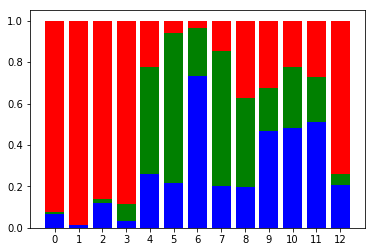

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


#valeurs = {"p1":[0.4, 0.55, 0.05, 0.0], "p2":[0.2, 0.3, 0.5, 0.0], "p3":[0.4, 0.2, 0.2, 0.2], "p4":[0.2, 0.2, 0.2, 0.4], "p5":[0.4, 0.55, 0.05, 0.0], "p6":[0.4, 0.55, 0.05, 0.0], "p7":[0.4, 0.55, 0.05, 0.0]}
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','deeppink']

valeurs_freq = dict()
valeurs_prob = dict()

for x in range(0,number_of_slices):   # initialising values[timeperiod] = "list of freq" dictionaries
    valeurs_freq[x] = list()
    valeurs_prob[x] = list()


for x in range(0,number_of_slices):
    list_freq = list()
    list_prob = list()
    total_prob_slice = 0
    
    for sense in correl_pairs.keys():
        #print("\t\t",x,sense)
        list_freq.append(correl_pairs[sense][0][x])
        list_prob.append(correl_pairs[sense][1][x])
        total_prob_slice += correl_pairs[sense][1][x]  # this counts the total probability for Tx, for normalising
        
    valeurs_freq[x] = list_freq
    valeurs_prob[x] = list_prob
    for i in range(0,len(valeurs_prob[x])):
        valeurs_prob[x][i] = valeurs_prob[x][i]/total_prob_slice
    
print("freq")
for key in valeurs_freq:
    print(valeurs_freq[key])
    
print("prob")
for key in valeurs_prob:
    print(valeurs_prob[key])


#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs
    

#for key,vals in valeurs_freq.items():
#    print(key,vals)
    
#    for i in range(0,len(vals)):        
#        if i == 0:
#            previous = 0
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#        else:         
#            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#plt.xticks(range(len(valeurs_freq)), valeurs_freq.keys())

#plt.show()

#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs

previous = 0

for key,vals in valeurs_prob.items():
    print(key,vals)
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
        else:         
            previous = vals[i-1] + previous
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
plt.xticks(range(len(valeurs_prob)), valeurs_prob.keys())

plt.show()

## plotting expert

0 [0.3333333333333333, 0.6666666666666666, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE NA 1
TOTAL HITS FOR SENSE harmonia:concrete 2
TOTAL HITS FOR SENSE harmonia:musical 0
TOTAL HITS FOR SENSE harmonia:abstract 0
1 [0, 0, 0, 0]
lenght of vals 4
TOTAL HITS FOR SENSE NA 0
TOTAL HITS FOR SENSE harmonia:concrete 0
TOTAL HITS FOR SENSE harmonia:musical 0
TOTAL HITS FOR SENSE harmonia:abstract 0
2 [0, 0, 0, 0]
lenght of vals 4
TOTAL HITS FOR SENSE NA 0
TOTAL HITS FOR SENSE harmonia:concrete 0
TOTAL HITS FOR SENSE harmonia:musical 0
TOTAL HITS FOR SENSE harmonia:abstract 0
3 [0.2222222222222222, 0.2222222222222222, 0.5555555555555556, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE NA 2
TOTAL HITS FOR SENSE harmonia:concrete 2
TOTAL HITS FOR SENSE harmonia:musical 5
TOTAL HITS FOR SENSE harmonia:abstract 0
4 [0.27586206896551724, 0.006896551724137931, 0.5379310344827586, 0.1793103448275862]
lenght of vals 4
TOTAL HITS FOR SENSE NA 40
TOTAL HITS FOR SENSE harmonia:concrete 1
TOTAL HITS FOR SEN

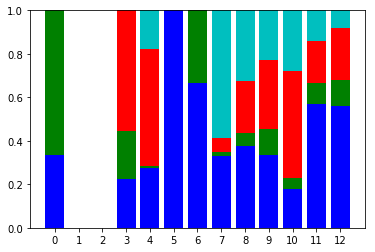

In [319]:
import numpy as np
import matplotlib.pyplot as plt

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


valeurs = period_relative
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','magenta','peru']
#colours = ['b','g','r','c','m','y','k','w']
colors = couleurs

for key,vals in valeurs.items():
    print(key,vals)
    print("lenght of vals",len(vals))
    
    
    
    for i in range(0,len(vals)):        
        if i == 0:
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = 0
            #print(i)
            #print(colours[i],"height=",vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
        else:         
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = vals[i-1] + previous
            #print("i",i,"key=period",key)
            #print(colours[i],"height=",vals[i])
            #print(vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
plt.xticks(range(len(valeurs)), valeurs.keys())

expert_image = s_senses.name.split("/")[-1]

#plt.figure(figsize=(20,10))
image = plt.gcf()
image.savefig(dir_out+"/"+expert_image+".png")
plt.show()